In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

회귀 신경망을 이용해 보스턴 집값을 예측하는 모델을 만들어 본다.

In [2]:
# 일관된 결과값이 나오도록 numpy와 tensorflow의 seed를 설정한다.
np.random.seed(0)
tf.random.set_seed(0)

회귀 신경망에 사용할 데이터 준비

In [3]:
# 데이터 불러오기
raw_data = datasets.load_boston() # 사이킷런이 제공하는 보스턴 집값 데이터를 불러온다.

# 피쳐, 레이블 데이터 저장
xData = raw_data.data # 피쳐 데이터를 저장한다.
yData = raw_data.target # 피쳐 데이터에 따른 레이블을 저장한다.
print(xData.shape, yData.shape)
# 총 13개의 피쳐가 있고, 이는 신경망을 생성할 때 사용된다.

# 레이블 종류 확인
# 레이블의 종류를 확인함으로써 분류 문제인지 아니면 회귀 문제인지 파악할 수 있고, 
# 분류 문제라면 몇 가지 클래스로 구분되는 지 알 수 있다.
print(set(yData))

# 레이블 데이터 원-핫 인코딩은 분류 문제일 사용하고 회귀 문제일 경우 사용하지 않는다.
# 학습 데이터와 테스트 데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(xData, yData, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(506, 13) (506,)
{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3

시퀀스를 사용하는 회귀 신경망 생성

In [4]:
# 회귀 신경망 모델 학습에 사용되는 피쳐 개수(n)를 저장한다.
# 회귀 신경망은 클래스 개수를 별도로 저장할 필요 없다.
n = x_train.shape[1]
print(f'입력 데이터 1건(피쳐)의 차원: {n}')
epochs = 50

입력 데이터 1건(피쳐)의 차원: 13


In [5]:
# Sequential 객체 선언 후 Sequential 모델에 add() 메소드로 레이어를 추가해서 신경망을 만든다.
model = Sequential() # 시퀀스를 사용하는 신경망 모델을 만든다.

# 입력 레이어를 만든다.
# input_dim 속성으로 입력 데이터 1건(피쳐)의 차원, units 속성으로 레이어의 출력 차원,
# activation 속성으로 활성화 함수를 지정한다.
model.add(Dense(input_dim=n, units=20, activation='relu'))

# 출력 레이어를 만든다.
# 분류 신경망은 구분해야 할 클래스 개수만큼 units 속성을 지정해야 했지만 회귀 신경망은 1건을
# 예측만 하기 때문에 units 속성값을 1로 지정하면 된다.
# 분류 문제를 풀 때는 최종 활성화 함수로 'softmax'를 사용했지만 회귀 문제를 풀때는 최종 활성화
# 함수로 항등(선형) 함수를 사용해야 하는데 코드 상에서 최종 활성화 함수를 지정하지 않으면
# 항등 함수가 기본값으로 적용된다.
model.add(Dense(units=1))
model.summary() # 신경망 모델의 구조를 확인한다.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


회귀 신경망 모델 컴파일

In [6]:
# compile() 메소드로 생성한 신경망 모델을 컴파일 한다.
# 회귀 신경망은 loss 속성에 손실(비용, 오차) 함수를 지정할 때 'mean_squared_error'를 지정한다.
# optimizer 속성에 최적화 함수(일반적으로 adam)를 지정한다.
# metrics 속성에 평가 기준을 지정한다.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

회귀 신경망 모델 학습

In [7]:
# fit() 메소드의 인수로 학습 데이터와 원-핫 인코딩된 학습 데이터에 따른 레이블 및 epochs 속성에 학습 횟수,
# batch_size 속성에 미니 배치 크기를 넘겨서 컴파일된 신경망 모델을 학습시킨다.
history = model.fit(x_train, y_train, epochs=epochs, batch_size=5)

Epoch 1/50
76/76 [==============================] - 0s 840us/step - loss: 21655.9883 - mean_squared_error: 21655.9883
Epoch 2/50
76/76 [==============================] - 0s 880us/step - loss: 1620.0365 - mean_squared_error: 1620.0365
Epoch 3/50
76/76 [==============================] - 0s 813us/step - loss: 397.4615 - mean_squared_error: 397.4615
Epoch 4/50
76/76 [==============================] - 0s 880us/step - loss: 205.5918 - mean_squared_error: 205.5918
Epoch 5/50
76/76 [==============================] - 0s 842us/step - loss: 142.3159 - mean_squared_error: 142.3159
Epoch 6/50
76/76 [==============================] - 0s 828us/step - loss: 119.3864 - mean_squared_error: 119.3864
Epoch 7/50
76/76 [==============================] - 0s 878us/step - loss: 105.8624 - mean_squared_error: 105.8623
Epoch 8/50
76/76 [==============================] - 0s 923us/step - loss: 97.2276 - mean_squared_error: 97.2276
Epoch 9/50
76/76 [==============================] - 0s 867us/step - loss: 87.0372 - 

In [8]:
# 모델 epoch 단계별로 정확도와 오차 확인
print(history.history['loss'][-1]) # 모델 실행 결과에서 오차만 얻어온다.
print(history.history['mean_squared_error'][-1]) # 모델 실행 결과에서 평균 제곱 오차만 얻어온다.

34.23689270019531
34.23689270019531


In [9]:
# evaluate() 메소드로 테스트 데이터와 원-핫 인코딩된 테스트 데이터에 따른 레이블을 넘겨서
# 학습된 신경망을 평가한다.
print(model.evaluate(x_test, y_test))

4/4 [==============================] - 0s 1ms/step - loss: 45.8330 - mean_squared_error: 45.8330
[45.83304214477539, 45.83304214477539]


학습 결과 시각화

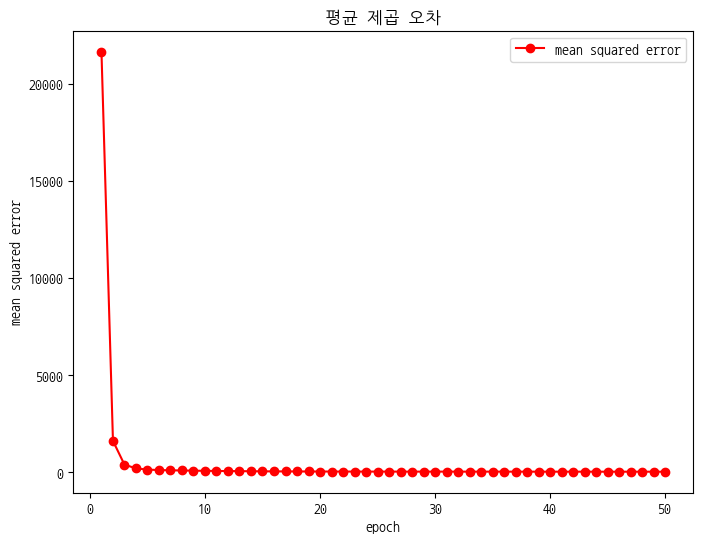

In [10]:
# 평균 제곱 오차 시각화
epoch = np.arange(1, epochs + 1)
mse = history.history['mean_squared_error']

plt.figure(figsize=(8, 6))
plt.plot(epoch, mse, 'ro-', label='mean squared error')
plt.title('평균 제곱 오차')
plt.xlabel('epoch')
plt.ylabel('mean squared error')
plt.legend()
plt.show()
# 평균 제곱 오차 시각화 결과 에포크 진행 단계별로 전반적인 오차가 하락하는 것을 볼 수 있다.

In [11]:
# 테스트 데이터의 실제값(레이블)을 기억하는 데이터프레임 만든다.
result_df = pd.DataFrame(y_test, columns=['real_value'])
result_df

,real_value
0,22.6
1,50.0
2,23.0
3,8.3
4,21.2
...,...
122,19.4
123,21.2
124,20.3
125,18.8


In [17]:
# predict() 메소드에 테스트 데이터의 피쳐값을 넘겨 예측값을 계산한다.
predict = model.predict(x_test)
print(type(predict), predict.shape)
# flatten() 메소드는 배열을 무조건 1차원 배열로 변환한다.
# predict = model.predict(x_test).flatten()
# print(type(predict), predict.shape)
print(predict)

4/4 [==============================] - 0s 1ms/step
<class 'numpy.ndarray'> (127, 1)
[[21.609253 ]
 [23.672058 ]
 [26.726156 ]
 [14.3790865]
 [18.38813  ]
 [21.78362  ]
 [20.629395 ]
 [25.111088 ]
 [14.0025625]
 [ 7.578227 ]
 [ 5.3750505]
 [13.763146 ]
 [17.488579 ]
 [ 8.8386545]
 [34.162556 ]
 [25.26889  ]
 [21.241306 ]
 [35.475315 ]
 [28.594057 ]
 [26.034658 ]
 [24.4838   ]
 [22.117638 ]
 [23.575653 ]
 [29.96887  ]
 [26.652775 ]
 [19.208908 ]
 [22.707457 ]
 [12.8455515]
 [31.252882 ]
 [24.745024 ]
 [17.135902 ]
 [19.316437 ]
 [24.12698  ]
 [24.487976 ]
 [29.414703 ]
 [20.970573 ]
 [ 9.639241 ]
 [24.818504 ]
 [16.822617 ]
 [13.03325  ]
 [24.493748 ]
 [24.117409 ]
 [20.00877  ]
 [17.088558 ]
 [26.746647 ]
 [26.20974  ]
 [16.043997 ]
 [19.09986  ]
 [14.269336 ]
 [26.308067 ]
 [ 5.036481 ]
 [14.769908 ]
 [22.163227 ]
 [25.13512  ]
 [ 8.633405 ]
 [16.918139 ]
 [23.176908 ]
 [17.113873 ]
 [ 9.72598  ]
 [21.887177 ]
 [23.109394 ]
 [19.922852 ]
 [25.982027 ]
 [26.375217 ]
 [17.596416 ]
 [28.5

In [18]:
# 데이터프레임에 예측값을 파생 변수로 추가한다.
result_df['predict_value'] = predict
result_df

,real_value,predict_value
0,22.6,21.609253
1,50.0,23.672058
2,23.0,26.726156
3,8.3,14.379086
4,21.2,18.388130
...,...,...
122,19.4,19.805744
123,21.2,22.366568
124,20.3,24.937149
125,18.8,21.831276


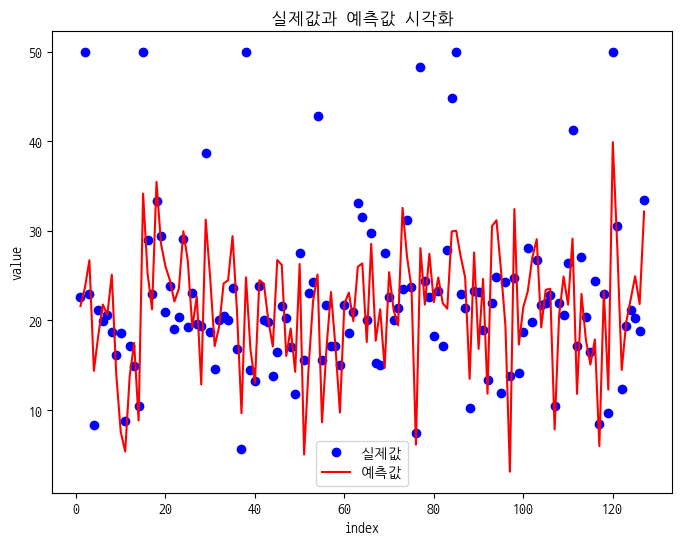

In [22]:
# 테스트 데이터의 레이블(실제값)과 예측값 시각화
plt.figure(figsize=(8, 6))
idx = np.arange(1, len(result_df) + 1)
plt.plot(idx, result_df.real_value, 'bo', label='실제값')
plt.plot(idx, result_df.predict_value, 'r-', label='예측값')
plt.title('실제값과 예측값 시각화')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

In [23]:
# 예측값을 기준으로 데이터프레임을 오름차순 정렬한다.
df_sort = result_df.sort_values(['predict_value'], ascending=True)
df_sort

,real_value,predict_value
96,13.8,3.118192
50,15.6,5.036481
10,8.8,5.375051
116,8.4,5.974149
75,7.4,6.132104
...,...,...
97,24.7,32.436337
72,23.5,32.566895
14,50.0,34.162556
17,33.3,35.475315


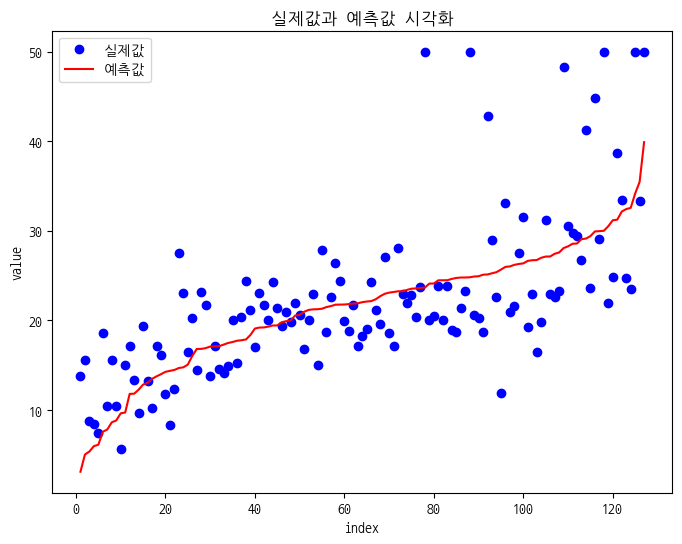

In [28]:
plt.figure(figsize=(8, 6))
idx = np.arange(1, len(df_sort) + 1)
plt.plot(idx, df_sort.real_value, 'bo', label='실제값')
plt.plot(idx, df_sort.predict_value, 'r-', label='예측값')
plt.title('실제값과 예측값 시각화')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()